In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('SalariesSimple - Salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1608 non-null   float64
 1   annual_base_pay         1651 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [4]:
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1607 entries, 0 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1607 non-null   float64
 1   annual_base_pay         1607 non-null   float64
dtypes: float64(2)
memory usage: 37.7 KB


In [6]:
for index, row in df.iterrows():
    if row['annual_base_pay'] >= 50000000.0:
        df = df.drop(index=index)

In [7]:
def testTrainSplit (df):
    length = len(df.index)
    splitPoint = round(length * 0.70)
    training = df.iloc[:splitPoint, :]
    testing = df.iloc[splitPoint:, :]
    return training, testing

In [8]:
training, testing = testTrainSplit (df)

In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1157
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  1123 non-null   float64
 1   annual_base_pay         1123 non-null   float64
dtypes: float64(2)
memory usage: 26.3 KB


In [10]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 1158 to 1654
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_experience_years  481 non-null    float64
 1   annual_base_pay         481 non-null    float64
dtypes: float64(2)
memory usage: 11.3 KB


<AxesSubplot:xlabel='total_experience_years', ylabel='annual_base_pay'>

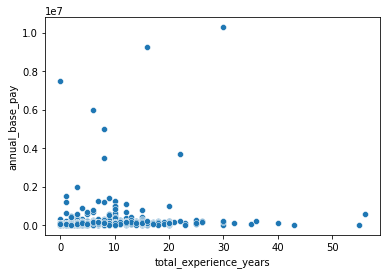

In [11]:
sns.scatterplot(data = df, x=df['total_experience_years'], y=df['annual_base_pay'])

In [12]:
df.describe()

,total_experience_years,annual_base_pay
count,1604.000000,1.604000e+03
mean,6.755505,1.393165e+05
std,5.683884,4.664039e+05
min,0.000000,0.000000e+00
25%,3.000000,6.100000e+04
50%,5.000000,9.909500e+04
75%,10.000000,1.300000e+05
max,56.000000,1.028000e+07


In [13]:
def lineOfBestFit (df, lSlope, hSlope, lYIntercept, hYIntercept):
    whichIsBest = []
    b = -1
    for slope in range (lSlope, hSlope, 100):
        for yIntercept in range (lYIntercept, hYIntercept, 100): 
            dSum = 0
            for index, row in df.iterrows():
                x1 = row['total_experience_years'] 
                y1 = row['annual_base_pay']
                d = (abs((slope*x1) + (b*y1) + yIntercept))/(((slope**2) + (b**2))**0.5)
                dSum = dSum + d
            template = {"Distance Sum": dSum, "Slope": slope, "Y-Intercept": yIntercept}
            whichIsBest.append(template)
    
    dictionary = findSmallestSum (whichIsBest)
    
    return dictionary

In [14]:
def findSmallestSum (whichIsBest):
    lowest = float ('inf')
    for sum in whichIsBest:
        if sum['Distance Sum'] < lowest:
            lowest = sum['Distance Sum']
            dictionary = sum
    return dictionary

In [15]:
dictionary = lineOfBestFit (training, 0, 33000, 0, 10000)

KeyboardInterrupt: 

In [ ]:
print(dictionary)

In [ ]:
dictionary = {'Distance Sum': 5897.387531770356, 'Slope': 31000, 'Y-Intercept': 0}

In [ ]:
def MSE (df, slope, yIntercept):
    sum = 0
    for row in range (len(df.index)):
        x = df.iat[row, 0]
        y = df.iat[row, 1]
        predictedY = (slope * x) + yIntercept
        sum = ((predictedY - y)**2) + sum
    return sum/len(df.index)

In [ ]:
MSE = MSE (testing, dictionary["Slope"], dictionary["Y-Intercept"])